## 图像基本操作

#### 环境配置地址：

- Anaconda:https://www.anaconda.com/download/

- Python_whl:https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv

- eclipse:按照自己的喜好，选择一个能debug就好

![title](lena_img.png)

### 数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [1]:
import cv2 #opencv读取的格式是BGR, 最好使用opencv中自带的api展示
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

img=cv2.imread('cat.jpg')

In [ ]:
img

In [2]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0) # 0 表示等待一次输入
cv2.destroyAllWindows()

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img.shape

In [ ]:
img=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
img

In [ ]:
img.shape

In [ ]:
#图像的显示,也可以创建多个窗口
cv2.imshow('cat title',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000) 
cv2.destroyAllWindows()

In [ ]:
#保存
cv2.imwrite('mycat.png',img)

In [ ]:
type(img)

In [ ]:
img.size # 和matlab不一样，相当于length，但是与numpy一致

In [ ]:
img.dtype

### 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [ ]:
video = cv2.VideoCapture('test.mp4')

In [ ]:
# 检查是否打开正确
if video.isOpened(): 
    open, frame = video.read()
else:
    open = False

In [ ]:
def playVideo(video):
    ret, frame = video.read()
    while ret:
#         frame = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', frame)
        ret, frame = video.read()
        if cv2.waitKey(5) & 0xFF == 27: # 0xFF => esc
            break
    video.release()
    cv2.destroyAllWindows()

playVideo(video)

### 截取部分图像数据

In [ ]:
img=cv2.imread('cat.jpg')
cat=img[0:50,0:200]
cv_show('cat',cat)

### 颜色通道提取

In [ ]:
b,g,r=cv2.split(img)

In [ ]:
r

In [ ]:
r.shape

In [ ]:
img=cv2.merge((b,g,r))
img.shape

In [ ]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [ ]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [ ]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 边界填充

In [ ]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [3]:
img_cat=cv2.imread('cat.jpg')
img_dog=cv2.imread('dog.jpg')

In [ ]:
img_cat2= img_cat +10 
img_cat[:5,:,0]

In [ ]:
img_cat2[:5,:,0]

In [ ]:
#相当于% 256
(img_cat + img_cat2)[:5,:,0] 

In [ ]:
# 不会溢出，只会达到最大值255
cv2.add(img_cat,img_cat2)[:5,:,0]

### 图像融合

In [4]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [25]:
img_cat.shape

(414, 500, 3)

### 注意三个size
- imagesize = （W,H）
- shape = (H,W,C)
- resize = ((W,H))
![image.png](size.png)

In [42]:
img = cv2.resize(img_dog, (500, 414))
cv2.imshow('resize',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
res = cv2.addWeighted(img_cat, 0.4, img, 0.6, 0)

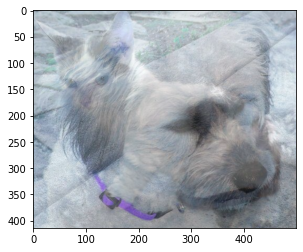

In [45]:
plt.imshow(res)

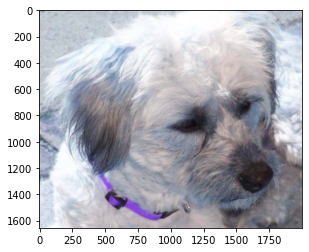

In [46]:
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)

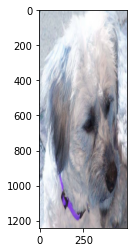

In [47]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)